In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.shape

(150, 6)

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print(data.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
print(data.groupby(by='Species',as_index= False)["Id"].count())

           Species  Id
0      Iris-setosa  50
1  Iris-versicolor  50
2   Iris-virginica  50


In [9]:
print(data.Species.value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


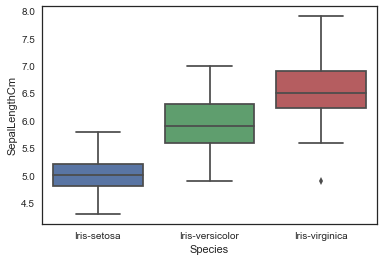

In [10]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

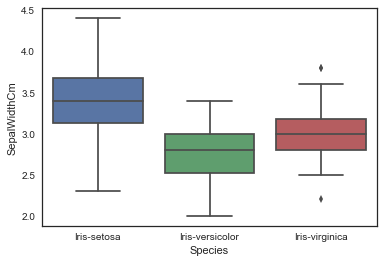

In [11]:
sns.boxplot(x="Species",y="SepalWidthCm",data=data)

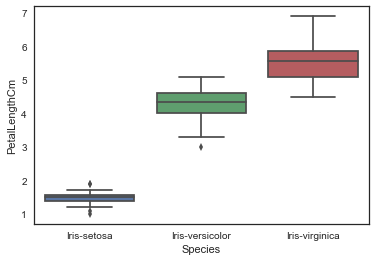

In [12]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

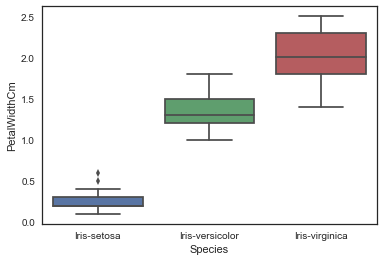

In [13]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data)

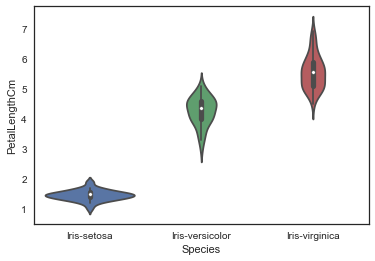

In [14]:
sns.violinplot(x="Species",y="PetalLengthCm",data=data)

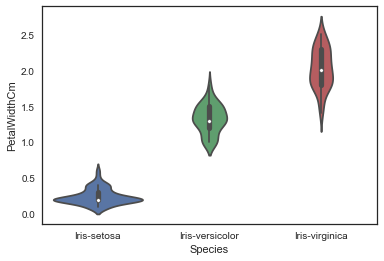

In [15]:
sns.violinplot(x="Species",y="PetalWidthCm",data=data)

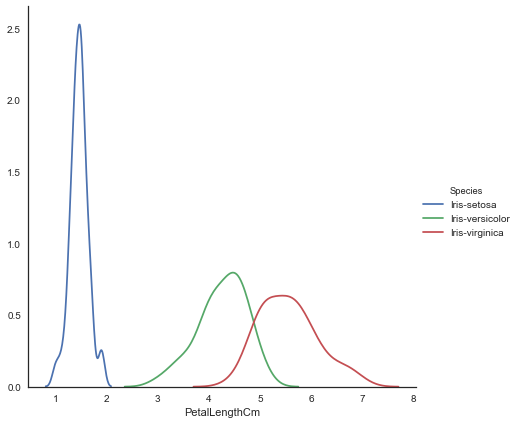

In [16]:
sns.FacetGrid(data,hue="Species",size=6).map(sns.kdeplot,"PetalLengthCm").add_legend()

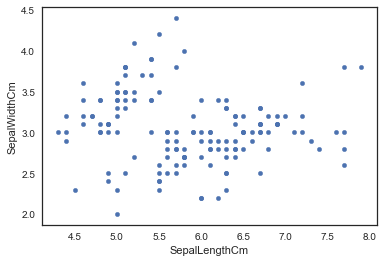

In [17]:
#relationship between SepalLengthCm and SepalWidthCm
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


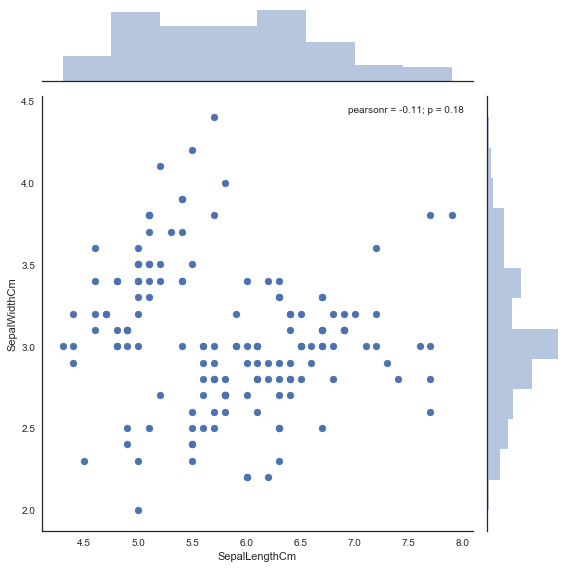

In [18]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm",data=data,size=8)

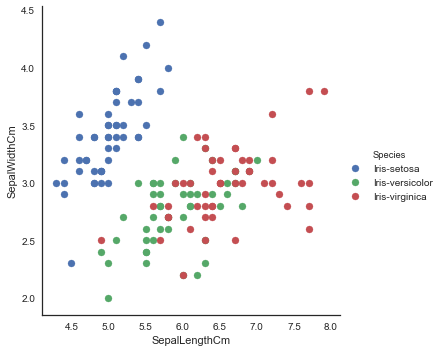

In [19]:
sns.FacetGrid(data,hue="Species",size=5).map(plt.scatter, "SepalLengthCm","SepalWidthCm").add_legend()

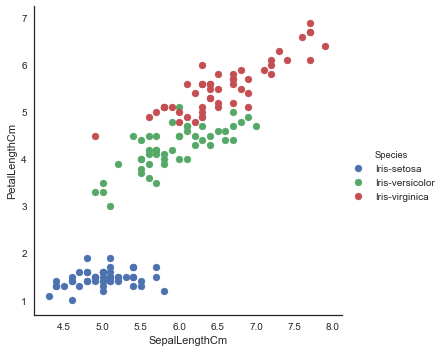

In [20]:
sns.FacetGrid(data,hue="Species",size=5).map(plt.scatter, "SepalLengthCm","PetalLengthCm").add_legend()

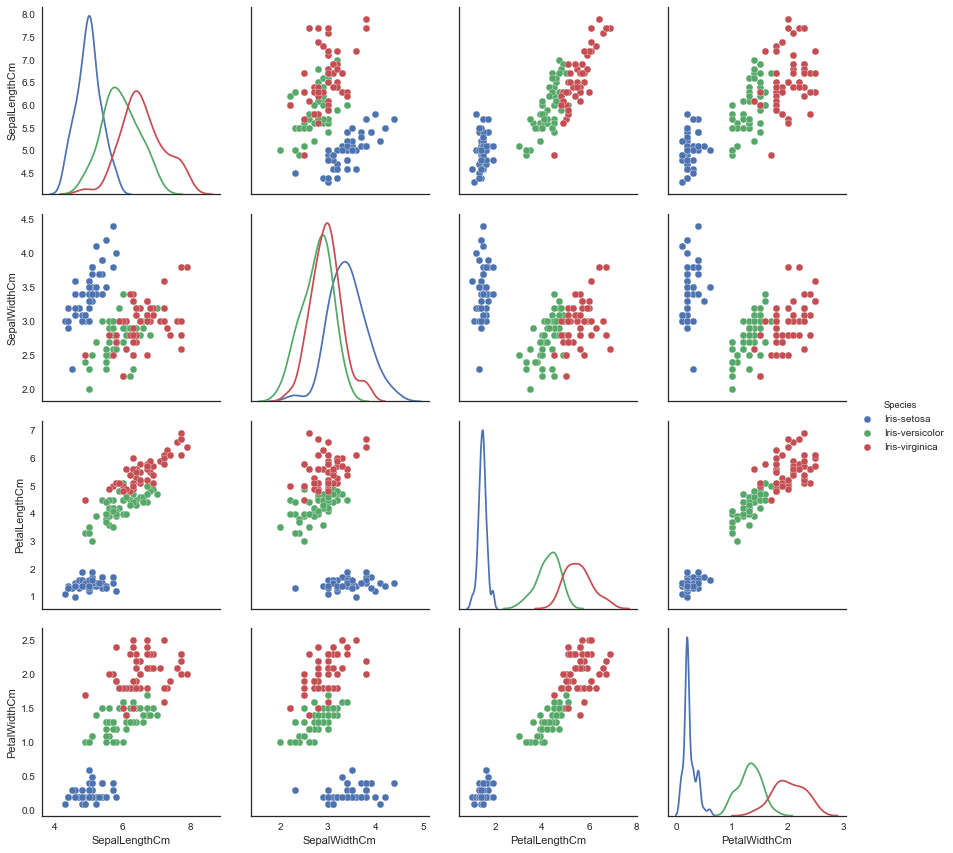

In [21]:
sns.pairplot(data.drop("Id",axis=1),hue="Species",size=3,diag_kind="kde")

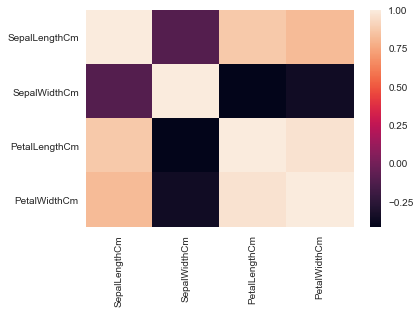

In [22]:
corr_matrix=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].corr()
sns.heatmap(corr_matrix)

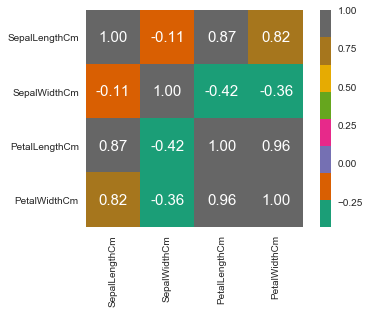

In [23]:
sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':
15},yticklabels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'],
xticklabels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'],cmap='Dark2')

In [32]:
data_melt = pd.melt(data.drop('Id',axis=1), 'Species', var_name = 'measurement')
data_melt.head(10)

,Species,measurement,value
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalLengthCm,4.9
2,Iris-setosa,SepalLengthCm,4.7
3,Iris-setosa,SepalLengthCm,4.6
4,Iris-setosa,SepalLengthCm,5.0
5,Iris-setosa,SepalLengthCm,5.4
6,Iris-setosa,SepalLengthCm,4.6
7,Iris-setosa,SepalLengthCm,5.0
8,Iris-setosa,SepalLengthCm,4.4
9,Iris-setosa,SepalLengthCm,4.9


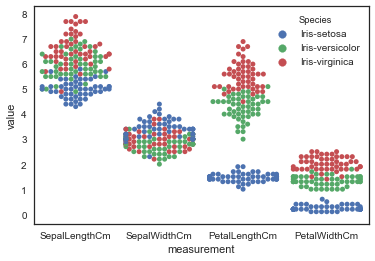

In [33]:
sns.swarmplot(x="measurement",y='value', data=data_melt,hue='Species')

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
names =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

X = data[names]
Y = data["Species"]
Z=le.transform(Y)

rf = RandomForestRegressor()
rf.fit(X, Z)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.6161, 'PetalLengthCm'), (0.3723, 'PetalWidthCm'), (0.0063, 'SepalWidthCm'), (0.0053, 'SepalLengthCm')]
